In [1]:
import pandas as pd

cols = ["title", "price", "listPrice", "stars", "reviews"]

df = pd.read_csv("../data/amazon_products.csv", usecols=cols)

df.head()


,title,stars,reviews,price,listPrice
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,0.00
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,209.99
2,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,429.99
3,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,354.37
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,309.99


In [2]:
df.shape


(1426337, 5)

In [3]:
df = df.sample(100000, random_state=42)
df.shape


(100000, 5)

In [4]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["listPrice"] = pd.to_numeric(df["listPrice"], errors="coerce")

df.isnull().sum()


title        0
stars        0
reviews      0
price        0
listPrice    0
dtype: int64

In [5]:
df["discount_percent"] = ((df["listPrice"] - df["price"]) / df["listPrice"]) * 100

df[["title","price","listPrice","discount_percent"]].head()



,title,price,listPrice,discount_percent
904813,Jitsu Squad (PS5),39.82,0.00,-inf
426645,Google WiFi Wall Mount ABS Bracket Holder Shel...,11.99,0.00,-inf
395996,"Cables Direct Online, Bulk 18/4 Stranded Condu...",94.95,0.00,-inf
986224,"Houseables 4 Oz Plastic Containers with Lids, ...",13.58,15.39,11.760884
1132337,co2CREA Hard Travel Case Replacement for TP-Li...,14.99,0.00,-inf


In [6]:
df = df[df["listPrice"] > 0]


In [7]:
df["discount_percent"] = ((df["listPrice"] - df["price"]) / df["listPrice"]) * 100
df.describe()


,stars,reviews,price,listPrice,discount_percent
count,24404.000000,24404.000000,24404.000000,24404.000000,24404.000000
mean,4.222451,352.100516,39.821667,51.622761,21.052215
std,0.999256,2696.104470,64.838106,83.114564,14.346300
min,0.000000,0.000000,0.000000,1.740000,-353.218495
25%,4.200000,0.000000,11.990000,15.390000,10.010010
50%,4.500000,0.000000,19.990000,25.990000,17.630056
75%,4.700000,0.000000,38.952500,49.990000,29.391963
max,5.000000,118833.000000,916.950000,999.950000,100.000000


In [8]:
def classify_discount(d):
    if d < 0:
        return "Fake Price"
    elif d > 80:
        return "Suspicious Discount"
    else:
        return "Normal Discount"

df["discount_type"] = df["discount_percent"].apply(classify_discount)

df["discount_type"].value_counts()


discount_type
Normal Discount        24355
Fake Price                28
Suspicious Discount       21
Name: count, dtype: int64

In [9]:
df[df["discount_type"] == "Fake Price"][["title","price","listPrice","discount_percent"]].head(10)


,title,price,listPrice,discount_percent
1174526,Petz Catz 2 - Nintendo DS,32.97,17.00,-93.941176
73364,Kingdom Hearts III - PlayStation 4 Deluxe Edition,73.49,59.99,-22.503751
315827,NBA 2K19 (Nintendo Switch),49.99,11.03,-353.218495
315341,The Last Samurai,19.99,5.97,-234.840871
580842,"252-LCT100 Lens Cleaning Towelette Dispenser, ...",15.33,13.04,-17.561350
1176536,FIFA Soccer 09 All-Play - Nintendo Wii,19.50,15.99,-21.951220
652370,Dead Alliance: Day One Edition - Xbox One,21.49,18.41,-16.730038
919197,Shaun White Snowboarding - Sony PSP,26.99,10.72,-151.772388
736876,Life Is Strange: True Colors Standard - Xbox [...,59.99,29.99,-100.033344
792360,wet n wild Fantasy Makers Halloween Paint Pale...,6.95,6.49,-7.087827


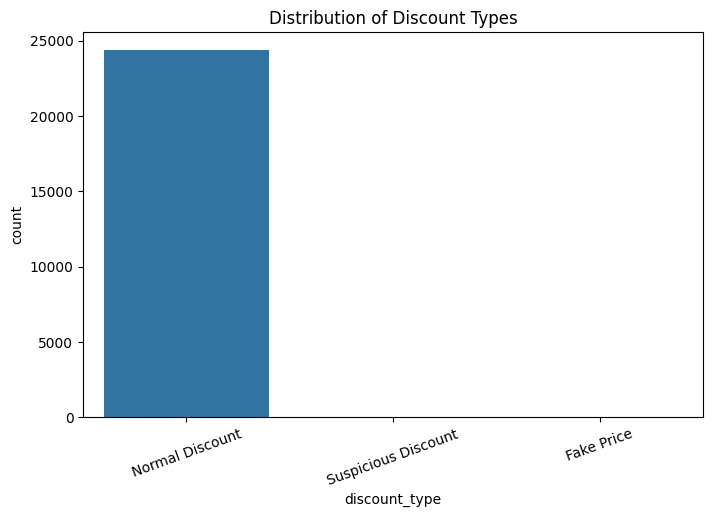

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="discount_type", data=df)
plt.title("Distribution of Discount Types")
plt.xticks(rotation=20)
plt.show()


In [11]:
def authenticity_score(row):
    score = 100
    
    # discount logic
    if row["discount_percent"] < 0:
        score -= 70
    elif row["discount_percent"] > 80:
        score -= 40
    elif row["discount_percent"] > 50:
        score -= 10
        
    # rating trust
    if row["stars"] < 3:
        score -= 20
        
    # review trust
    if row["reviews"] < 50:
        score -= 10
        
    return max(score,0)

df["authenticity_score"] = df.apply(authenticity_score, axis=1)

df[["title","discount_percent","stars","reviews","authenticity_score"]].head(10)


,title,discount_percent,stars,reviews,authenticity_score
986224,"Houseables 4 Oz Plastic Containers with Lids, ...",11.760884,4.6,0,90
26048,MBM131 Men's Black 11-Inch Classic Square Toe ...,25.681712,4.4,0,90
919984,Coated Dumbbell Weight | Multiple Handle Options,16.756982,4.7,0,90
100063,Toddler Boys' Relaxed Organic Cotton Short Sle...,20.000000,5.0,1,90
179844,"Yankee Candle Oil, Sleep Diffuser Refill, Blue...",10.962822,4.3,469,100
310843,Men Linen Flat Ivy Breathable Summer Newsboy Hat,11.771630,4.2,1290,100
150898,Satco 60 Watt 120 V T9 Incandescent Light Bulb...,16.669445,0.0,0,70
672283,"Face Lift Tape, Face Tape Lifting Invisible, F...",16.847373,4.3,0,90
50487,"2500W Portable Handheld Steam Cleaner, High Te...",6.124627,4.0,80,100
637878,Nordic Pure 20x25x5 MERV 12 Pleated Lennox X66...,7.247427,4.7,0,90


In [12]:
df.sort_values(by="authenticity_score", ascending=False)[
    ["title","price","listPrice","discount_percent","stars","reviews","authenticity_score"]
].head(10)


,title,price,listPrice,discount_percent,stars,reviews,authenticity_score
266586,CEWOR 4pcs Artificial Cherry Blossom Flower Vi...,17.99,26.99,33.345684,4.5,5294,100
179844,"Yankee Candle Oil, Sleep Diffuser Refill, Blue...",9.34,10.49,10.962822,4.3,469,100
107272,"Tulip One-Step Tie-Dye Kit Two-Minute Tie Dye,...",12.99,14.99,13.342228,4.7,193,100
72931,Borderlands 3 (PS4),14.28,16.28,12.285012,4.3,1342,100
50487,"2500W Portable Handheld Steam Cleaner, High Te...",43.99,46.86,6.124627,4.0,80,100
310843,Men Linen Flat Ivy Breathable Summer Newsboy Hat,14.99,16.99,11.771630,4.2,1290,100
49566,EnviroCare Replacement Vacuum Cleaner Filter S...,9.84,12.99,24.249423,4.7,683,100
178376,LegActivator - The Seated Leg Exerciser & Phys...,259.00,349.00,25.787966,4.0,504,100
166588,GRAND PITSTOP Tire Puncture Repair Kit with 30...,44.99,52.99,15.097188,4.2,2258,100
304528,"850+ Pcs Party Favors for Kids 4-8 8-12, Party...",29.99,36.99,18.924034,4.3,277,100


In [13]:
df.sort_values(by="authenticity_score", ascending=True)[
    ["title","price","listPrice","discount_percent","stars","reviews","authenticity_score"]
].head(10)


,title,price,listPrice,discount_percent,stars,reviews,authenticity_score
1391540,Mohawk Epoxy Putty Stick (Natural Oak) for Per...,19.49,19.38,-0.567595,4.7,0,20
1010302,Designer Wellness Designer Whey Natural 100% W...,19.99,18.96,-5.432489,4.3,0,20
21062,Resident Evil: Revelations 2 - Xbox 360,43.00,19.84,-116.733871,4.3,0,20
918828,Mx vs ATV Untamed - Sony PSP,40.55,19.99,-102.851426,3.8,0,20
522602,"Dynarex White Petrolatum, Petroleum Jelly for ...",14.82,13.70,-8.175182,4.7,0,20
1173672,Toy Story 3 The Video Game - Nintendo DS,41.12,19.99,-105.702851,4.5,0,20
732997,NHL 15 - PlayStation 3,39.93,22.98,-73.759791,4.2,0,20
411398,Brush Buddies Hot Wheels Kids Toothbrushes Kit...,6.00,4.99,-20.240481,4.7,0,20
792360,wet n wild Fantasy Makers Halloween Paint Pale...,6.95,6.49,-7.087827,4.8,0,20
1174526,Petz Catz 2 - Nintendo DS,32.97,17.00,-93.941176,4.0,0,20


In [14]:
# low authenticity = fake
df["is_fake"] = (df["authenticity_score"] < 60).astype(int)

df["is_fake"].value_counts()


is_fake
0    24357
1       47
Name: count, dtype: int64

In [15]:
X = df[["price","listPrice","discount_percent","stars","reviews"]]
y = df["is_fake"]



In [16]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",150
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [19]:
pred = model.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, pred))
print("\nReport:\n", classification_report(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))


Accuracy: 1.0

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4872
           1       1.00      1.00      1.00         9

    accuracy                           1.00      4881
   macro avg       1.00      1.00      1.00      4881
weighted avg       1.00      1.00      1.00      4881


Confusion Matrix:
 [[4872    0]
 [   0    9]]


In [21]:
df["ml_label"] = (
    (df["discount_percent"] < -40) |   # price > MRP (fake listing)
    (df["discount_percent"] > 80)      # unrealistic discount
).astype(int)

df["ml_label"].value_counts()


ml_label
0    24370
1       34
Name: count, dtype: int64

In [22]:
X = df[["price","listPrice","stars","reviews"]]
y = df["ml_label"]


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",   # ⭐ very important
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [25]:
pred = model.predict(X_test)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4874
           1       1.00      0.14      0.25         7

    accuracy                           1.00      4881
   macro avg       1.00      0.57      0.62      4881
weighted avg       1.00      1.00      1.00      4881

[[4874    0]
 [   6    1]]


In [27]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

y_resampled.value_counts()


ml_label
0    19496
1    19496
Name: count, dtype: int64

In [29]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_resampled, y_resampled)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",12
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [30]:
pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4874
           1       0.56      0.71      0.62         7

    accuracy                           1.00      4881
   macro avg       0.78      0.86      0.81      4881
weighted avg       1.00      1.00      1.00      4881

[[4870    4]
 [   2    5]]


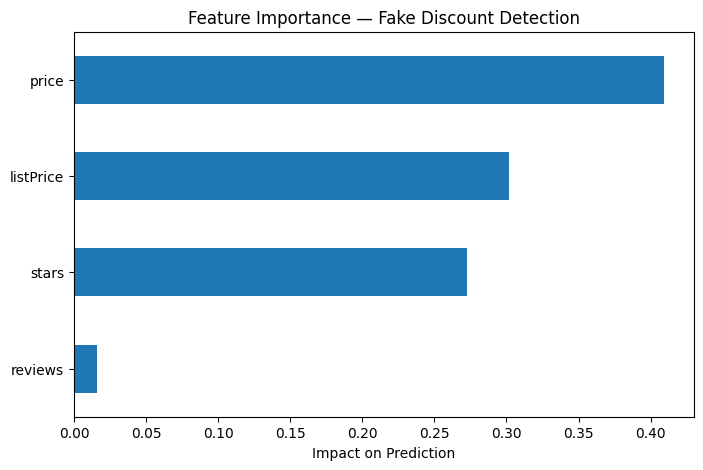

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

importance = model.feature_importances_

features = pd.Series(importance, index=X.columns)
features.sort_values().plot(kind="barh", figsize=(8,5))

plt.title("Feature Importance — Fake Discount Detection")
plt.xlabel("Impact on Prediction")
plt.show()


In [32]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import joblib

joblib.dump(model, "../dashboard/fake_discount_model.pkl")


['../dashboard/fake_discount_model.pkl']

In [ ]:
export_df = df[[
    "price","listPrice","discount_percent","stars","reviews","discount_type","authenticity_score"
]]

export_df.to_csv("dashboard/powerbi_data.csv", index=False)


In [34]:
cat = pd.read_csv("../data/amazon_categories.csv")
cat.head()


,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [36]:
df = pd.read_csv("../data/amazon_products.csv")

# basic cleaning again
df = df[df["listPrice"] > 0]

df["discount_percent"] = ((df["listPrice"] - df["price"]) / df["listPrice"]) * 100


In [37]:
df.columns


Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth',
       'discount_percent'],
      dtype='object')

In [39]:
cat = pd.read_csv("../data/amazon_categories.csv")

df = df.merge(cat, left_on="category_id", right_on="id", how="left")


In [43]:
cat = pd.read_csv("../data/amazon_categories.csv")
cat.columns


Index(['id', 'category_name'], dtype='object')

In [44]:
df.columns


Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth',
       'discount_percent', 'id_x', 'category_name_x', 'id_y',
       'category_name_y'],
      dtype='object')

In [45]:
df["category_id"] = df["category_id"].astype(int)
cat["id"] = cat["id"].astype(int)


In [46]:
df = df.merge(cat, left_on="category_id", right_on="id", how="left")


In [47]:
df[["category_id","category_name"]].head(20)


,category_id,category_name
0,104,Suitcases
1,104,Suitcases
2,104,Suitcases
3,104,Suitcases
4,104,Suitcases
5,104,Suitcases
6,104,Suitcases
7,104,Suitcases
8,104,Suitcases
9,104,Suitcases


In [48]:
export_df = df[[
    "title",
    "category_name",
    "price",
    "listPrice",
    "discount_percent",
    "stars",
    "reviews",
    "isBestSeller",
    "boughtInLastMonth"
]].copy()


In [49]:
# fake flag for dashboard
df["fake_flag"] = (
    (df["discount_percent"] < -40) |
    (df["discount_percent"] > 80)
).astype(int)

# readable labels
df["deal_type"] = df["fake_flag"].map({
    0: "Genuine Deal",
    1: "Suspicious / Fake"
})

# discount buckets (very important for visuals)
df["discount_bucket"] = pd.cut(
    df["discount_percent"],
    bins=[-500,-50,0,10,25,50,80,200],
    labels=[
        "Price Higher Than MRP",
        "No Discount",
        "0-10%",
        "10-25%",
        "25-50%",
        "50-80%",
        "Unrealistic Discount"
    ]
)

# bestseller label
df["bestseller"] = df["isBestSeller"].map({True:"Yes", False:"No"})

# final dashboard table
powerbi_df = df[[
    "title",
    "category_name",
    "price",
    "listPrice",
    "discount_percent",
    "discount_bucket",
    "deal_type",
    "stars",
    "reviews",
    "bestseller",
    "boughtInLastMonth"
]]

# export
powerbi_df.to_csv("../dashboard/fake_discount_dashboard.csv", index=False)

print("EXPORT SUCCESS ✅")


EXPORT SUCCESS ✅
